In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [[5,5], [3,4], [6,3], [4,2], [6,0], [7,1], [8,4]]
polygon_example_2 = [[4, 1], [2, 2], [3, 5], [4, 7], [6, 6], [3, 9], [6, 8], [9, 10], [7, 4], [4, 3], [5, 0]]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [6]:
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

In [7]:
polygon = polygon_example_1

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [8]:
def is_y_monotonic(polygon):
    n=len(polygon)
    mi=0
    ma=polygon[0][1]
    mx=polygon[0][0]
    for i in range(1,n):
        if polygon[i][1]>ma:
            mi=i
            ma=polygon[i][1]
            mx=polygon[i][0]
        elif polygon[i][1]==ma and polygon[i][0]<mx:
            mi=i
            ma=polygon[i][1]
            mx=polygon[i][0]
    i=0
    count=1
    while polygon[(mi+count)%n][1]<=polygon[(mi+count-1)%n][1]and count<n-1:
        count+=1
    while polygon[(mi+count)%n][1]>=polygon[(mi+count-1)%n][1]and count<n-1:
        count+=1
    return True if count==n-1 else False


In [9]:
is_y_monotonic(polygon_example_2)

False

Przeprowadź test poprawności powyższej funkcji.

In [10]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [11]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

In [12]:
def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])

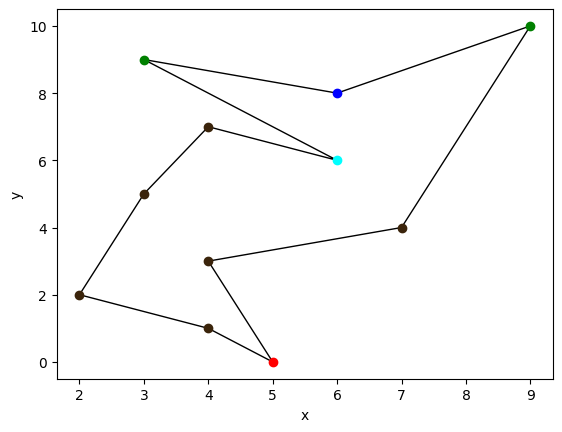

In [13]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [14]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    n=len(polygon)
    t=[None for i in range(n)]
    for i in range(n):
        if polygon[(i-1)%n][1]<polygon[i][1]and polygon[(i+1)%n][1]<polygon[(i)%n][1]:
            if mat_det_2x2(polygon[(i-1)%n],polygon[(i)%n],polygon[(i+1)%n])>0:
                t[i]=0
            else:
                t[i]=3
        elif polygon[(i-1)%n][1]>polygon[i][1]and polygon[(i+1)%n][1]>polygon[(i)%n][1]:
            if mat_det_2x2(polygon[(i-1)%n],polygon[(i)%n],polygon[(i+1)%n])>0:
                t[i]=1
            else:
                t[i]=2
        else:
            t[i]=4


    return t

Przeprowadź test poprawności powyższej funkcji. 

In [15]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.003s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

In [16]:
p=[[264, -52], [149, -122], [203, -101], [219, -135], [153, -185], [269, -156], [298, -193], [333, -108], [267, -129], [323, -72]]
colors = color_vertex(p)
draw_polygon_colors(p,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [17]:
def are_neighbours(a,b,n):
    diff=abs(a[3]-b[3])
    return diff==1 or diff==n-1
        
def triangle_in_polygon( a, b, c, epsilon=10 ** (-12)):
    if b[2] == "left":
        return mat_det_2x2(a, b, c) > epsilon
    else:
        return mat_det_2x2(a, b, c) < -epsilon
def chain_select(polygon):
        
        n=len(polygon)
        mi=0
        ma=polygon[0][1]
        mx=polygon[0][0]
        for i in range(1,n):
            if polygon[i][1]>ma:
                mi=i
                ma=polygon[i][1]
                mx=polygon[i][0]
            elif polygon[i][1]==ma and polygon[i][0]<mx:
                mi=i
                ma=polygon[i][1]
                mx=polygon[i][0]
        i=0
        count=1
        left=[]
        right=[]
        left.append([polygon[mi][0],polygon[mi][1],"left",mi])
        #polygon[mi]=[polygon[mi][0],polygon[mi][1],"left",mi]
        
        while polygon[(mi+count)%n][1]<=polygon[(mi+count-1)%n][1]and count<n-1:
            #polygon[(mi+count)%n]=[polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"left",(mi+count)%n]
            left.append([polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"left",(mi+count)%n])
            
            count+=1
        while polygon[(mi+count)%n][1]>=polygon[(mi+count-1)%n][1]and count<n-1:
            right.append([polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"right",(mi+count)%n])
            #polygon[(mi+count)%n]=[polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"right",(mi+count)%n]
            count+=1
        #polygon[(mi+count)%n]=[polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"right",(mi+count)%n]
        right.append([polygon[(mi+count)%n][0],polygon[(mi+count)%n][1],"right",(mi+count)%n])
        return left,right
def sort(polygon):
    l,r=chain_select(polygon)
    pol=[]
    nl=len(l)
    nr=len(r)
    ir=nr-1
    il=0
    while ir>=0 and il < nl:
        if l[il][1]>r[ir][1]:
            pol.append(l[il])
            il+=1
        elif l[il][1]<r[ir][1]:
            pol.append(r[ir])
            ir-=1
        elif l[il][0]>r[ir][0]:
            pol.append(r[ir])
            ir-=1
        else:
            pol.append(l[il])
            il+=1
    while il<nl:
        pol.append(l[il])
        il+=1
    while ir>=0:
        pol.append(r[ir])
        ir-=1
    return pol

def triangulation(polygon):
    
    
    
    if is_y_monotonic(polygon)==False:
        return "nie jest  monotoniczny"
    added_edg=[]
    #polygon=chain_select(polygon)
    polygon=sort(polygon)
    #polygon=sorted(polygon,key=lambda point:(-point[1], point[0]))#polygon sorted by y-coordinate decreasing
    stack=[polygon[0],polygon[1]]
    n=len(polygon)
    for i in range(2,n):
        if stack[-1][2]!=polygon[i][2]:
            while len(stack)>0:
                v=stack.pop()
                
                if are_neighbours(polygon[i],v,n)==False and [polygon[i][3],v[3]] not in added_edg:
                    
                    added_edg.append([polygon[i][3],v[3]])
                    
            stack=[polygon[i-1],polygon[i]]
        else:
            v = stack.pop()
            while len(stack) > 0 and triangle_in_polygon( stack[-1], v, polygon[i]):
                if are_neighbours(polygon[i],stack[-1],n)==False and [polygon[i][3],stack[-1][3]] not in added_edg:  
                    added_edg.append([polygon[i][3],stack[-1][3]])
                    
                v=stack.pop()
            stack.append(v)
            stack.append(polygon[i])
    
    return added_edg            



    

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [18]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

In [19]:
def triangulation_with_steps(pol):
    vis=Visualizer()
    polygon=pol[:]
    vis.add_polygon(polygon)
    vis.add_point(polygon,color="black")
    if is_y_monotonic(polygon)==False:
        return "nie jest  monotoniczny"
    added_edg=[]
    polygon=sort(polygon)
    #polygon=chain_select(polygon)
    #polygon=sorted(polygon,key=lambda point:(-point[1], point[0]))#polygon sorted by y-coordinate decreasing
    stack=[polygon[0],polygon[1]]
    n=len(polygon)
    for i in range(2,n):
        stack2=[]
        for s in stack:
            stack2.append(s[:2])
        vis.add_point(stack2,color="green")
        if stack[-1][2]!=polygon[i][2]:
            while len(stack)>0:
                v=stack.pop()
                vis.add_point(v[:2],color="red")
                if are_neighbours(polygon[i],v,n)==False and [polygon[i][3],v[3]] not in added_edg:
                    
                    added_edg.append([polygon[i][3],v[3]])
                    vis.add_line_segment([pol[added_edg[-1][0]],pol[added_edg[-1][1]]],color="red")
                vis.add_point(v[:2],color="black")
            stack=[polygon[i-1],polygon[i]]
        else:
            v = stack.pop()
            while len(stack) > 0 and triangle_in_polygon( stack[-1], v, polygon[i]):
                vis.add_point(v[:2],color="red")
                if are_neighbours(polygon[i],stack[-1],n)==False and [polygon[i][3],stack[-1][3]] not in added_edg:  
                    added_edg.append([polygon[i][3],stack[-1][3]])
                    vis.add_line_segment([pol[added_edg[-1][0]],pol[added_edg[-1][1]]],color="red")
                vis.add_point(v[:2],color="black")
                v=stack.pop()
            
            stack.append(v)
            stack.append(polygon[i])
    
    return added_edg,vis  

In [20]:
#przykładowe wielokąty:
p1=[[0.030693547033494514 ,-0.0404187105216232],
[0.008516127678655797, 0.0360825149685729],
[0.0003104825173654846, 0.014850897321514067],
[-0.01410484006327968, -0.0016625830706427924],
[-0.03384274328908614, -0.01446895561966241],
[-0.04493145296650549 ,-0.0188500830706428]]
p2=[[-0.0011310497406990389, 0.05034364616169651],
 [-0.03018346909553775, 0.03686325400483377],
 [-0.042159275547150654, 0.0038362932205200373],
 [-0.02641330780521517, -0.029190667563793703],
 [0.0006431438076880541, -0.046041157759872144],
 [0.027477821227042898, -0.029527677367715277],
 [0.03235685348510742, 0.001140214789147484],
 [0.028586692194784838, 0.02911202851463769]]
p3=[[0.002417337356075161, 0.04811376394010061],
 [-0.006453630385860332, 0.03126327374402216],
 [-0.024417340063279683, 0.021152979626375107],
 [-0.006675404579408711, 0.009020626685198624],
 [-0.034175404579408715, -0.0024377066481347104],
 [-0.006231856192311938, -0.013559030177546477],
 [-0.045929436837473234, -0.029735500765781776],
 [-0.006453630385860332, -0.036138687040291585],
 [-0.004679436837473225, -0.04422692233440923],
 [-2.2178772957098802e-05, -0.0499560890010759],
 [0.0037479825173654807, -0.04523795174617394],
 [0.004856853485107421, -0.03479064782460531],
 [0.04322378896897838, -0.026365402726566088],
 [0.0050786276786558004, -0.012548000765781775],
 [0.02548185348510741, -0.0010896674324484407],
 [0.005522176065752574, 0.010368665900884907],
 [0.01616733735607516, 0.02317503844990451],
 [0.0050786276786558004, 0.034633371783237846]]
p4=[[0.03877999059615596, -0.025073528383292402],
 [0.011501764789704341, -0.007212008775449252],
 [0.038336442209059185, 0.0062683833814135],
 [0.015493700273575314, 0.013008579459844863],
 [0.04121950672518822, 0.027500001028472332],
 [0.011501764789704341, 0.050416667695139],
 [-0.039506299726424686, 0.007279412793178203],
 [-0.022873235210295655, -0.009908087206821806],
 [-0.04527242875868275, -0.03080269504995907],
 [-0.00047404166190855024, -0.041924018579370836]]
p5=[[-0.003046627044677744, 0.04670955985200173],
 [-0.034538562528548714, 0.02480392259709978],
 [-0.030768401238226127, -0.023725489167606126],
 [0.0020541794069351693, -0.04158700877544927],
 [0.03775982456822549, -0.02338847936368456],
 [0.034654985858548065, 0.02581495200886448]]
p6=[[0.027247732531639826, -0.0187377430410946],
 [-0.014889364242553715, -0.005931370492074997],
 [0.039445313176801125, 0.006200982449101486],
 [-0.0031353319844892036, 0.0146262275471407],
 [0.04099773253163984, 0.025747551076552466],
 [-0.0038006545651343565, 0.03821691382165052],
 [0.042106603499381764, 0.05068627656674857],
 [-0.00513129972642469, 0.05304534519419954],
 [-0.050151461016747265, -0.04536151755089854]]
p7=[[0.04277192608002693, 0.0008762265186683937],
 [-0.0033571061780375833, 0.031544118675531155],
 [-0.04238936424255372, 0.043339461812786056],
 [-0.01777242875868275, 0.015367648087295849],
 [-0.03551436424255372, 0.010312501028472323],
 [-0.018437751339327915, -0.005863969559762983],
 [-0.0341837190812634, -0.012604165638194359],
 [-0.016885331984489202, -0.025747547991135537],
 [-0.04150226746836017, -0.033498773481331616],
 [-0.015554686823198882, -0.04023896955976299],
 [-0.036401461016747266, -0.04799019504995907],
 [-0.013115170694166622, -0.0530453421087826]]
p8=[[0.03523160349938177, -0.0065379891676061175],
 [0.0037396680155108025, 0.01637867749906055],
 [0.041884829305833385, 0.02446691279317821],
 [0.004848538983252729, 0.03794730495004095],
 [0.03767111962841403, 0.04435049122455076],
 [0.005735635757446289, 0.05210171671474684],
 [-0.04837726746836017, -0.0466421558342728]]
p9=[[0.00041305511228499625, -0.0378125],
 [0.03900176478970435, -0.0037745098039215635],
 [0.0013001518864785427, 0.036666666666666695],
 [-0.03595791262965049, -0.001752450980392145]]
p10=[[0.04277192608002693, -0.032150734265645346],
 [-0.01710710617803759, 0.049742648087295865],
 [-0.015332912629650496, 0.03761029514611938],
 [-0.017994202952231135, 0.020759804950040955],
 [-0.022873235210295655, 0.010312501028472323],
 [-0.0306353319844892, 0.004246324557884082],
 [-0.04083694488771501, 0.002561275538276231],
 [-0.04926436424255372, 0.0015502461265115286],
 [0.015050151886478541, -0.04158700877544927]]

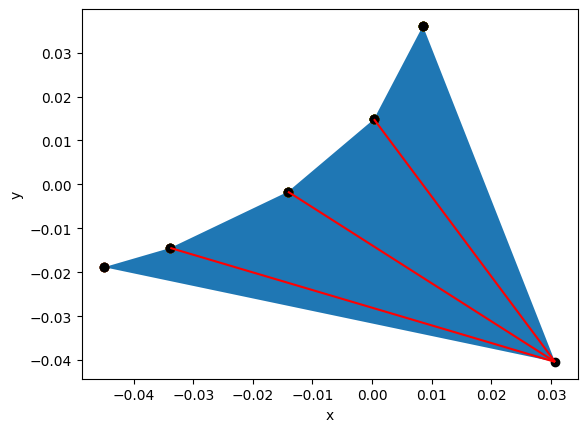

In [21]:
res,vis=triangulation_with_steps(p1)

vis.show()


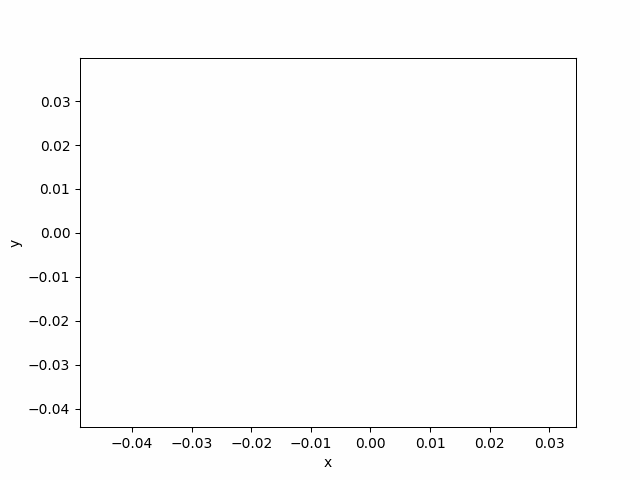

In [22]:
res,vis=triangulation_with_steps(p1)

vis.show_gif()

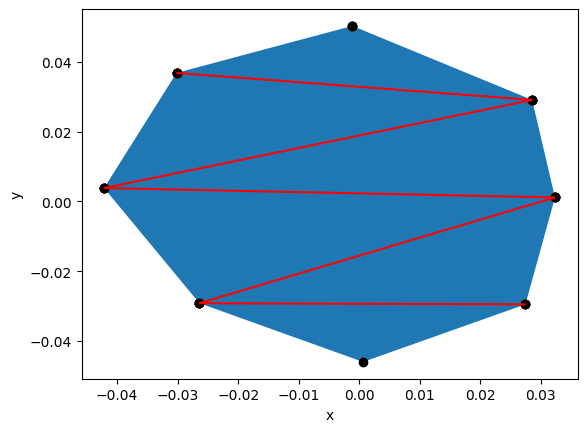

In [23]:
res,vis=triangulation_with_steps(p2)

vis.show()

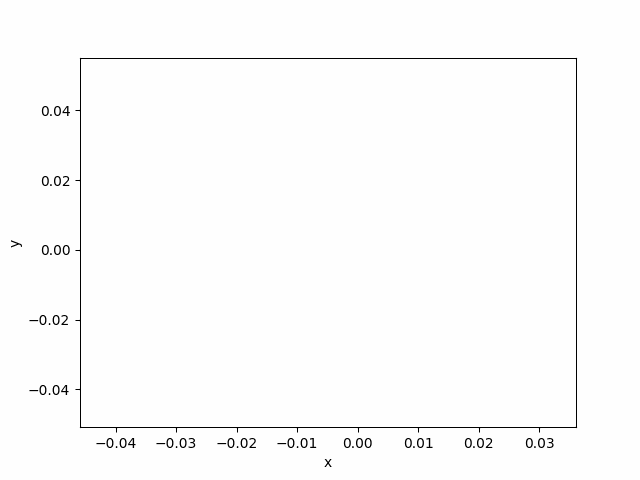

In [24]:
res,vis=triangulation_with_steps(p2)

vis.show_gif()

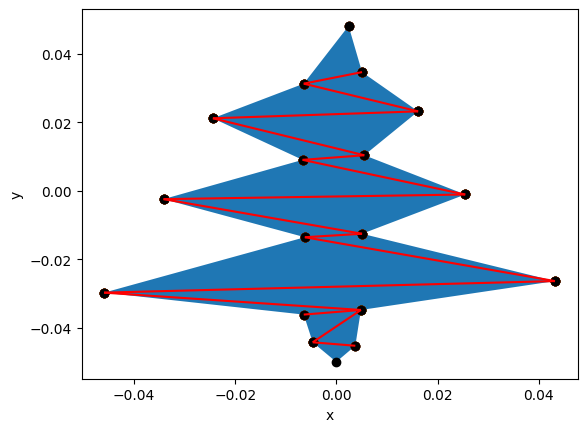

In [25]:
res,vis=triangulation_with_steps(p3)

vis.show()

In [26]:
res,vis=triangulation_with_steps(p3)

vis.show_gif()

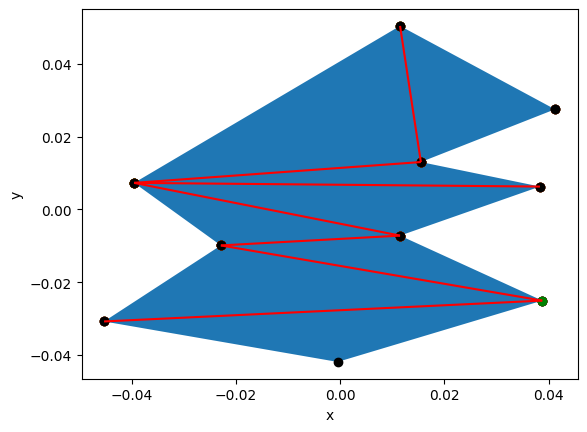

In [27]:
res,vis=triangulation_with_steps(p4)

vis.show()

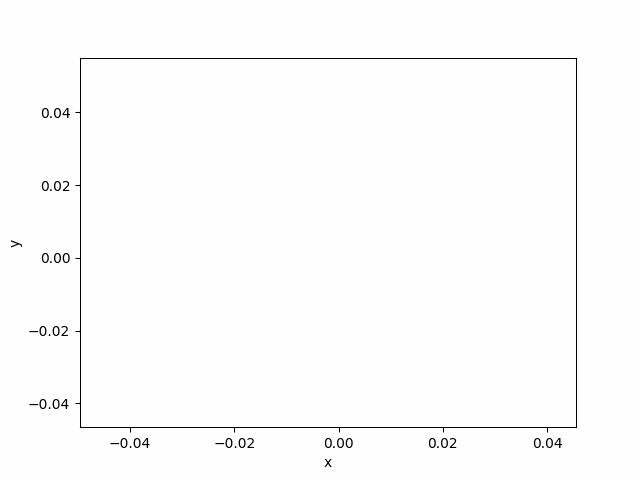

In [28]:
res,vis=triangulation_with_steps(p4)

vis.show_gif()

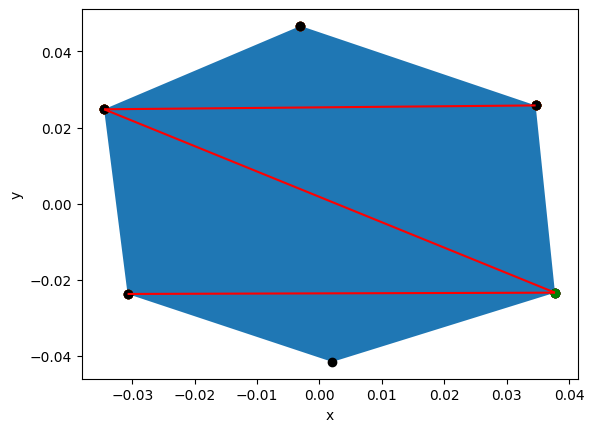

In [29]:
res,vis=triangulation_with_steps(p5)

vis.show()

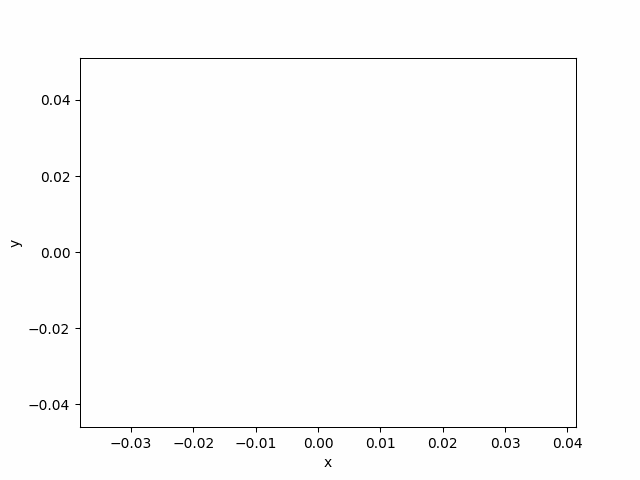

In [30]:
res,vis=triangulation_with_steps(p5)

vis.show_gif()

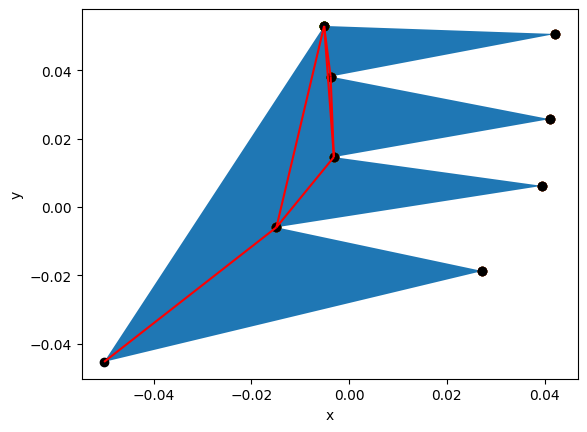

In [31]:
res,vis=triangulation_with_steps(p6)


vis.show()

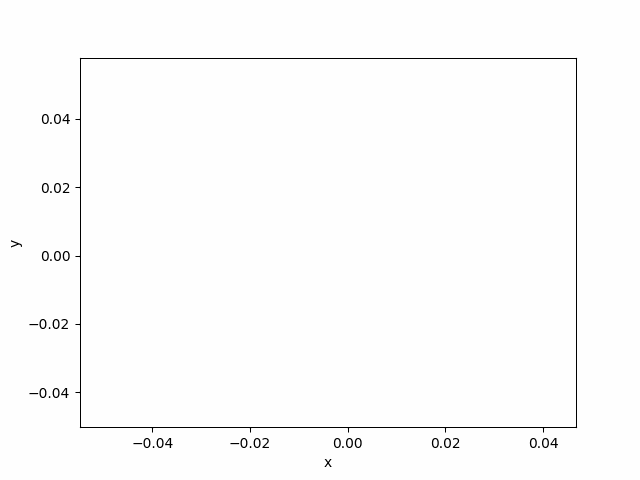

In [32]:
res,vis=triangulation_with_steps(p6)

vis.show_gif()

In [33]:
res,vis=triangulation_with_steps(p7)

vis.show()

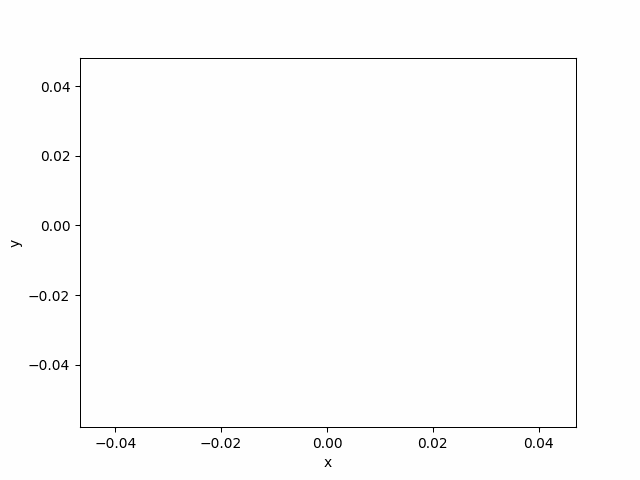

In [34]:
res,vis=triangulation_with_steps(p7)

vis.show_gif()

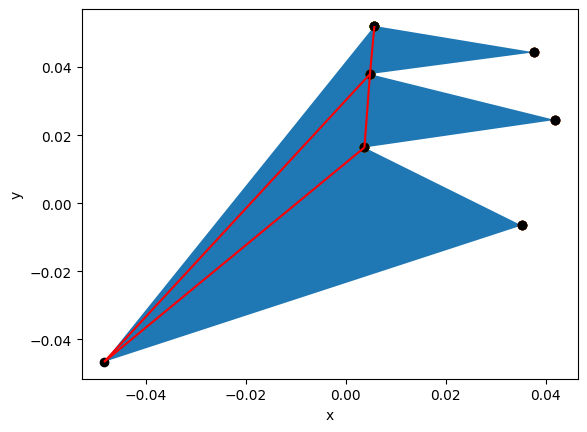

In [35]:
res,vis=triangulation_with_steps(p8)

vis.show()

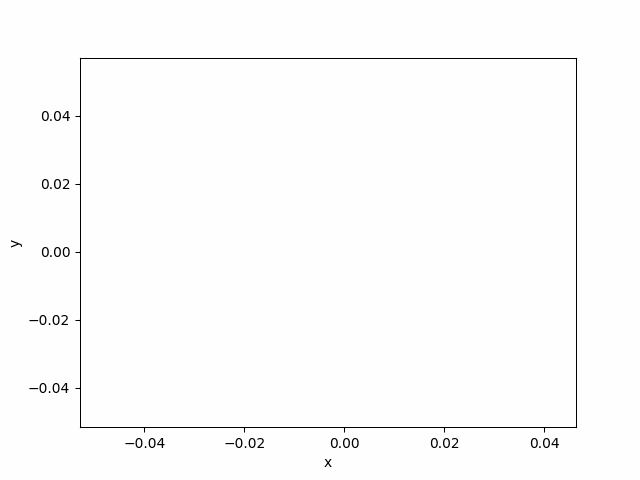

In [36]:
res,vis=triangulation_with_steps(p8)

vis.show_gif()

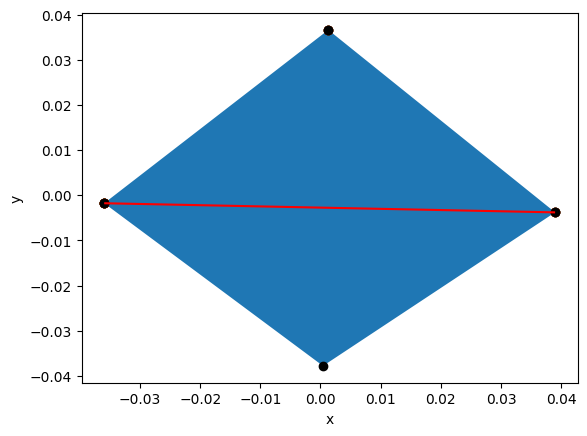

In [37]:
res,vis=triangulation_with_steps(p9)

vis.show()

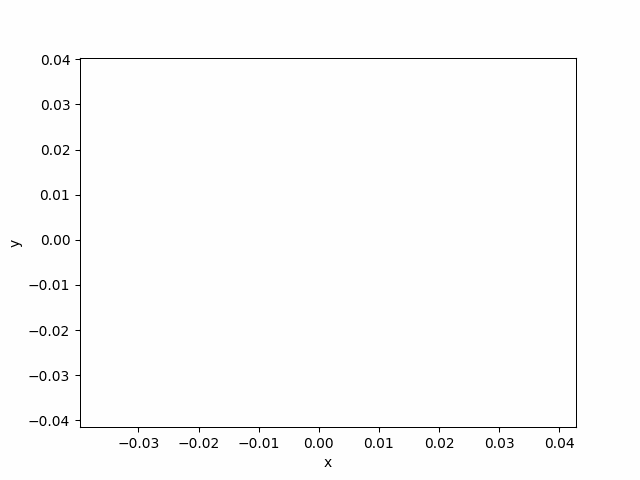

In [38]:
res,vis=triangulation_with_steps(p9)

vis.show_gif()

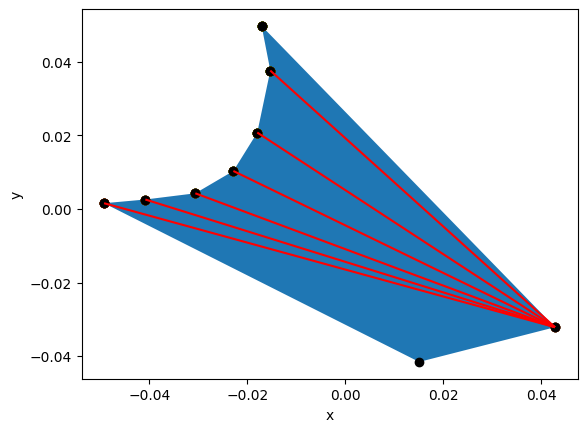

In [39]:
res,vis=triangulation_with_steps(p10)

vis.show()

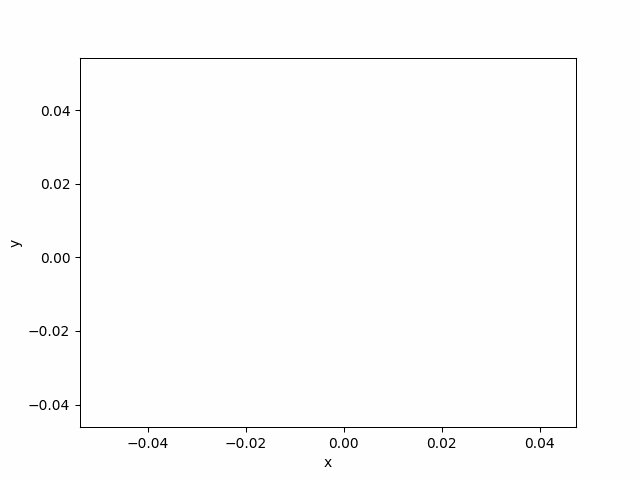

In [40]:
res,vis=triangulation_with_steps(p10)

vis.show_gif()

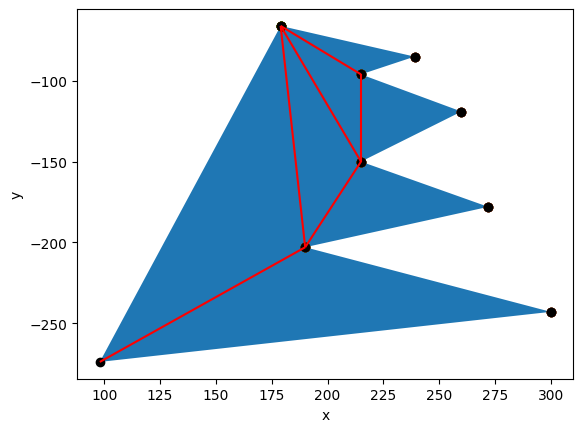

In [41]:
p=[[179, -66], [98, -274], [300, -243], [190, -203], [272, -178], [215, -150], [260, -119], [215, -96], [239, -85]]
res,vis=triangulation_with_steps(p)

vis.show()

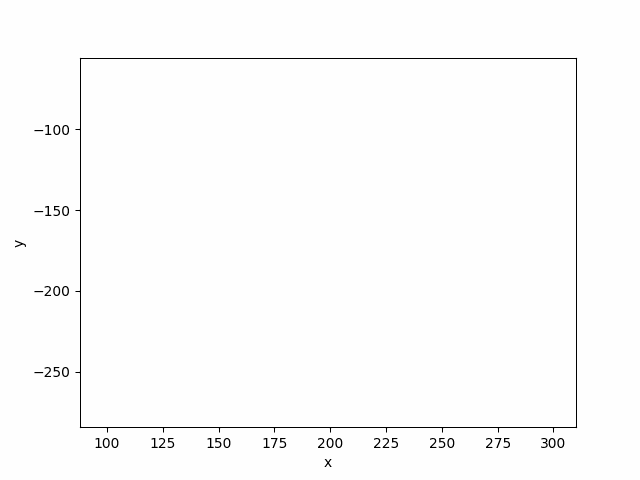

In [42]:
p=[[179, -66], [98, -274], [300, -243], [190, -203], [272, -178], [215, -150], [260, -119], [215, -96], [239, -85]]
res,vis=triangulation_with_steps(p)

vis.show_gif()

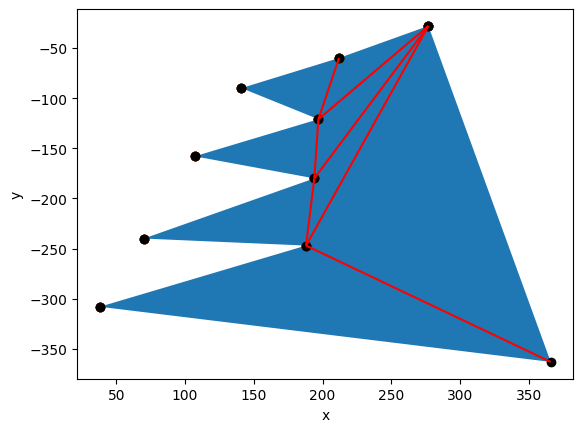

In [43]:
p=[[212, -60], [141, -90], [197, -121], [107, -158], [194, -180], [70, -240], [188, -247], [38, -308], [366, -363], [277, -28]]
res,vis=triangulation_with_steps(p)

vis.show()

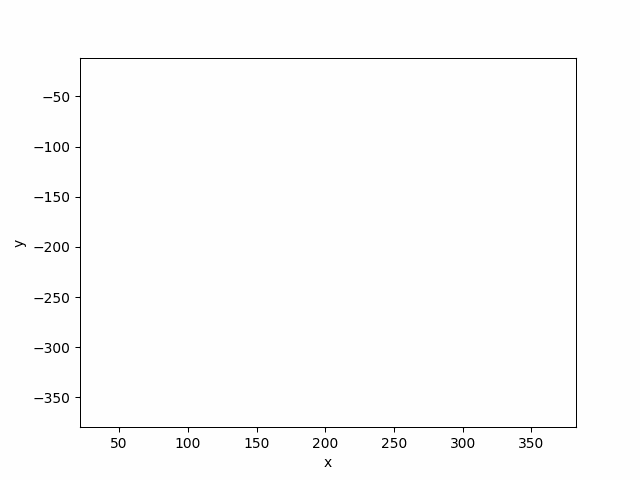

In [44]:
p=[[212, -60], [141, -90], [197, -121], [107, -158], [194, -180], [70, -240], [188, -247], [38, -308], [366, -363], [277, -28]]
res,vis=triangulation_with_steps(p)

vis.show_gif()

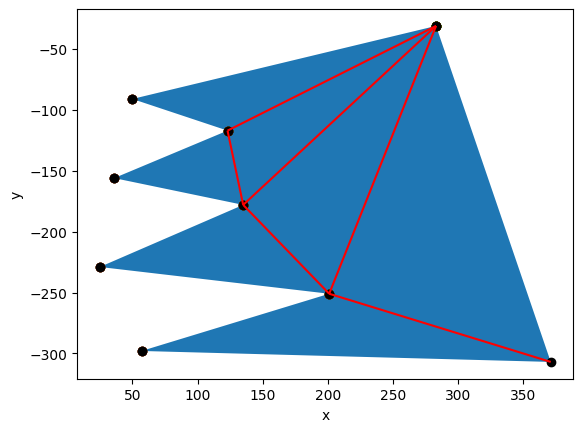

In [45]:
p=[[283, -31], [50, -91], [123, -117], [36, -156], [135, -178], [25, -229], [201, -251], [57, -298], [371, -307]]

res,vis=triangulation_with_steps(p)

vis.show()

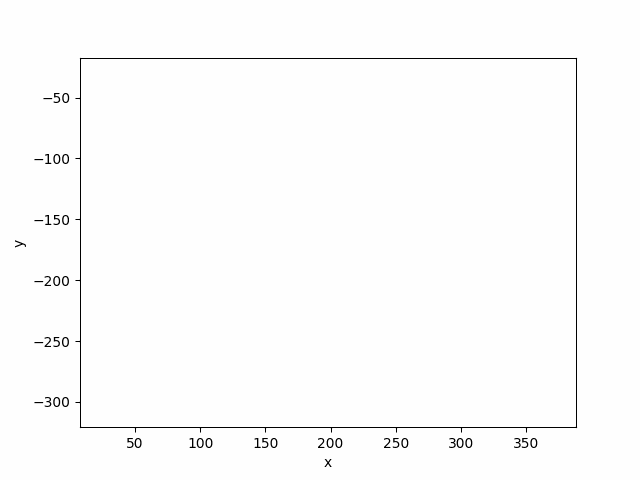

In [46]:
p=[[283, -31], [50, -91], [123, -117], [36, -156], [135, -178], [25, -229], [201, -251], [57, -298], [371, -307]]

res,vis=triangulation_with_steps(p)

vis.show_gif()

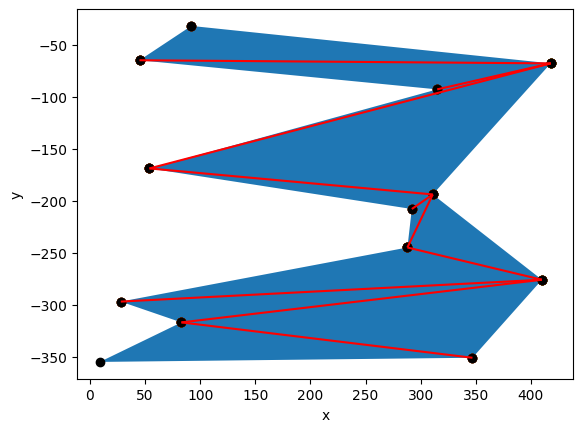

In [47]:
p=[[92, -32], [45, -65], [315, -93], [54, -169], [292, -208], [288, -245], [28, -297], [83, -317], [9, -355], [347, -351], [410, -276], [311, -194], [418, -68]]
res,vis=triangulation_with_steps(p)

vis.show()

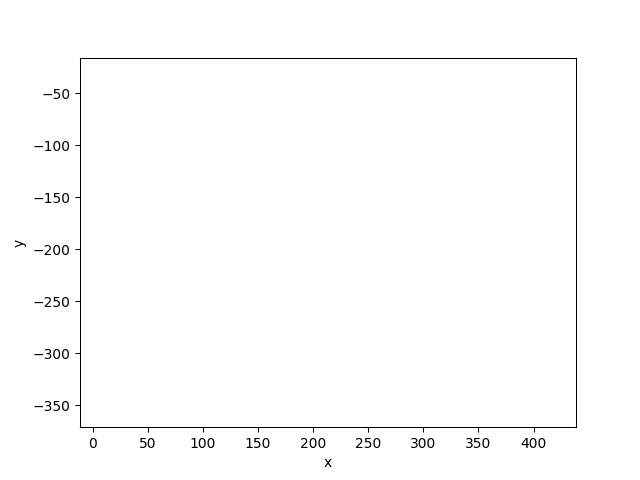

In [48]:
p=[[92, -32], [45, -65], [315, -93], [54, -169], [292, -208], [288, -245], [28, -297], [83, -317], [9, -355], [347, -351], [410, -276], [311, -194], [418, -68]]
res,vis=triangulation_with_steps(p)

vis.show_gif()